# Bài tập về nhà

## Mục tiêu
- Tự viết lại code cho giải thuật K-means
- Hiểu sâu hơn giải thuật K-means qua việc tự viết lại code
- Ứng dụng mô hình tự viết vào các bài toán đã ra trên lớp

## Dữ liệu

Giống dữ liệu của bài thực hành trên lớp (dữ liệu sinh ngẫu nhiên bằng sklearn và ảnh bird_small.png)

## Yêu cầu

Code K-means tự viết cho kết quả tương đương (không cần giống hệt) với giải thuật của thư viện sklearn khi áp dụng cho dữ liệu sinh ngẫu nhiên và dữ liệu ảnh.

# Các thư viện sử dụng

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

# Chuẩn bị dữ liệu
- Sinh dữ liệu ngẫu nhiên n_samples = 100 tương đương 100 điểm
    - random_state: biến cố định hàm random - để các điểm sinh ngẫu nhiên giống nhau giữa các máy tính
    
- Mỗi điểm dữ liệu có 2 chiều

In [ ]:
n_samples = 100
random_state = 170
center_points = [[1, 1], [-1, -1], [1, -1]] # sinh ngẫu nhiên các điểm xung quanh vị trí tâm cố định
#center_points = 3                           # tâm cụm được chọn ngẫu nhiên

X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=center_points, cluster_std=0.6)
print("Số chiều dữ liệu: ", X.shape, y.shape)
print("5 điểm dữ liệu đầu tiên: \n", X[:6])

Số chiều dữ liệu:  (100, 2) (100,)
5 điểm dữ liệu đầu tiên: 
 [[ 1.26241305  0.94872541]
 [-0.39743873 -1.18567406]
 [ 1.35081331  0.48041993]
 [ 1.21219555  0.98929291]
 [-0.75344338 -1.09784774]
 [ 2.67199591 -0.16659988]]


**Vẽ các điểm ảnh sử dụng matplotlib**

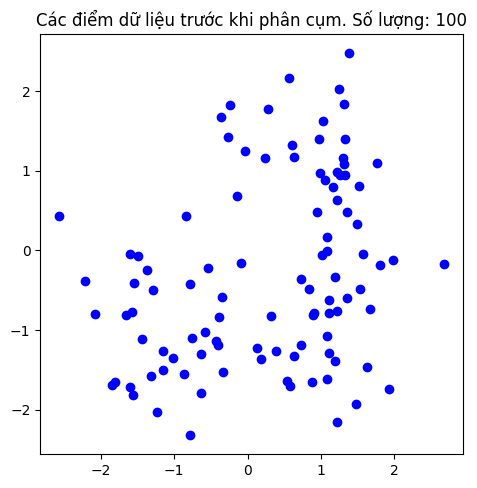

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c='blue') # c là tham số chọn màu sắc, có thể truyền vào string hoặc số id 1,2,3 ...
plt.title("Các điểm dữ liệu trước khi phân cụm. Số lượng: {}".format(n_samples))
plt.show()

# Tự xây dựng giải thuật K-means:

Viết code cho giải thuật K-means tại mục này

# Kiểm tra giải thuật K-means tự viết cho dữ liệu sinh ngẫu nhiên

- Áp dụng giải thuật K-means tự viết cho tập dữ liệu đã sinh ngẫu nhiên ở trên
- Quan sát kết quả và so sánh với giải thuật của sklearn

# Ứng dụng K-means tự viết vào nén ảnh

## Thư viện sử dụng - hỗ trợ hình ảnh

In [ ]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from IPython.core.display import Image, display

## Đọc dữ liệu hình ảnh
- Mỗi điểm ảnh là 1 mẫu quan sát
- Phân cụm tập dữ liệu (tập các điểm ảnh) về k nhãn

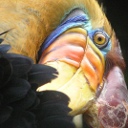

Số chiều của dữ liệu hình ảnh:  (16384, 3)
Tổng số điểm ảnh là:  16384
Mỗi điểm ảnh có số chiều =  3


In [ ]:
path_img = 'bird_small.png'
display(Image(path_img, width=250, unconfined=True))
img = io.imread(path_img)
data_img = (img / 255.0).reshape(-1,img.shape[2]) # chuyển ma trận 128x128x3 về mảng 2 chiều
img_shape = img.shape

print("Số chiều của dữ liệu hình ảnh: ", data_img.shape)
print("Tổng số điểm ảnh là: ", data_img.shape[0])
print("Mỗi điểm ảnh có số chiều = ", data_img.shape[1])

## Nén ảnh bằng giải thuật K-means tự viết

- Tạo file nén ảnh bằng giải thuật K-means tự viết
- Hiển thị kết quả của giải thuật tự viết và giải thuật của sklearn để so sánh


Ví dụ

Ảnh nén bằng K-means tự viết


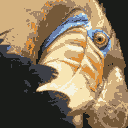

Ảnh nén bằng K-means của thư viện 


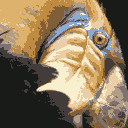

Ảnh gốc


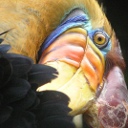

In [ ]:
print('Ảnh nén bằng K-means tự viết')
display(Image('img_128.png', width=250, unconfined=True))#kết quả tự cài đặt
print('Ảnh nén bằng K-means của thư viện ')
display(Image('img128.png', width=250, unconfined=True)) #kết quả của thư viện
print('Ảnh gốc')
display(Image(path_img, width=250, unconfined=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


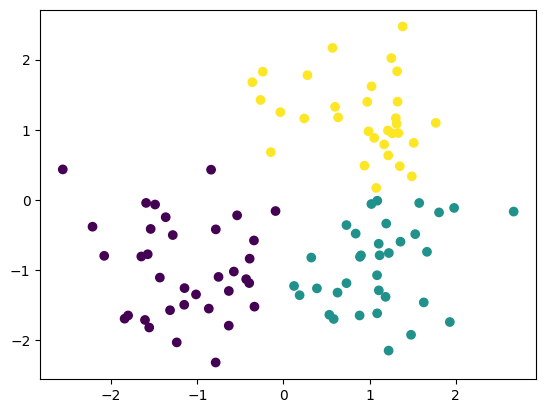

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


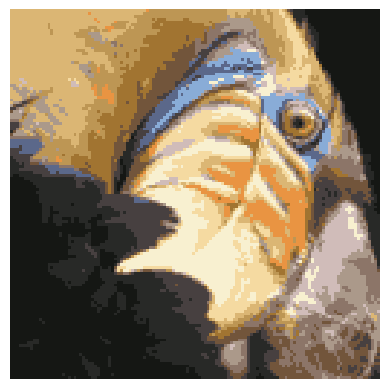

In [ ]:
# Kmeans của thư viện sklearn

# Dùng kmeans của thư viện với dữ liệu sinh ngẫu nhiên
kmeans_sklearn = KMeans(n_clusters = 3)
kmeans_sklearn.fit(X)
labels = kmeans_sklearn.predict(X)
kmeans_display(X, labels)

# Dùng kmeans của thư viện với ảnh
K = 15
X_2D = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
kmeans = KMeans(n_clusters=K).fit(X_2D)
label = kmeans.predict(X_2D)

img4 = np.zeros_like(X_2D)
# replace each pixel by its center
for k in range(K):
    img4[label == k] = kmeans.cluster_centers_[k]
# reshape and display output image
img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2])) # Reshape back to original dimensions
plt.imshow(img5, interpolation='nearest')
plt.axis('off')
plt.show()

Centers found by our algorithm:
 [[ 0.88823619  1.19442485]
 [-1.13949326 -0.97100768]
 [ 1.11177838 -0.94555162]]


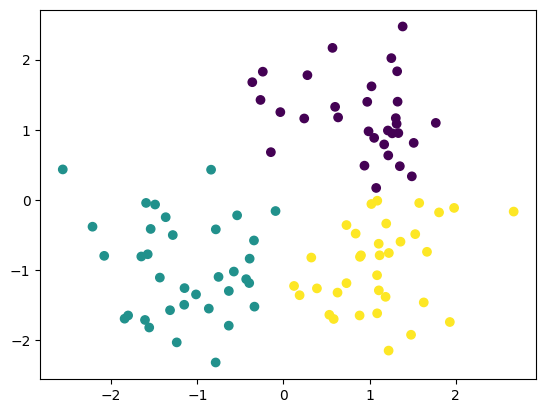

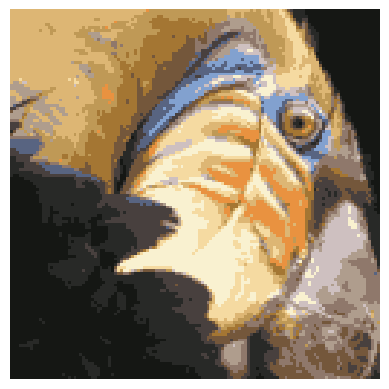

In [ ]:
# Kmeans mình tự viết

from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import random

def kmeans_init_centroids(X, k):
    # Bước 1: Chọn k centroids khởi tạo
    return X[np.random.choice(X.shape[0], k, replace=False)]
def kmeans_assign_labels(X, centroids):
    # Bước 2 Tính khoảng cách (ở đây là khoảng cách euclidean) giữa các điểm với centroids và đưa các điểm vào các cluster với centroid gần nhất
    D = euclidean_distances(X, centroids)
    # trả về index gần với centroid nhất
    return np.argmin(D, axis = 1)
def has_converged(centroids, new_centroids):
    # return True if two sets of centroids are the same
    return (set([tuple(a) for a in centroids]) ==
        set([tuple(a) for a in new_centroids]))
def kmeans_update_centroids(X, labels, K):
    centroids = np.zeros((K, X.shape[1]))
    for k in range(K):
        # Update centroid bằng cách lấy trung bình cộng tất cả các điểm trong cluster đó
        Xk = X[labels == k, :]
        centroids[k,:] = np.mean(Xk, axis = 0) # then take average
    return centroids

def kmeans(X, K):
    centroids = [kmeans_init_centroids(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centroids[-1]))
        new_centroids = kmeans_update_centroids(X, labels[-1], K)
        if has_converged(centroids[-1], new_centroids):
            break
        centroids.append(new_centroids)
        it += 1
    return (centroids, labels, it)
def kmeans_display(X, labels):
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.show()
def predict(X, centroids):
    return kmeans_assign_labels(X, centroids)

# Dùng kmeans tự viết cho dữ liệu sinh ngẫu nhiên
(centroids, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:\n', centroids[-1])
kmeans_display(X, labels[-1])

# Dùng kmeasn tự viết cho ảnh:

K = 15
X_2D = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
centroids, labels, it = kmeans(X_2D, K)
labels = labels[-1]
centroids = centroids[-1]

# Tạo ảnh mới sau khi nén
img4 = np.zeros_like(X_2D)
for k in range(K):
    img4[labels == k] = centroids[k]

img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))

# Hiển thị ảnh
plt.imshow(img5, interpolation='nearest')
plt.axis('off')
plt.show()


